In [1]:
from __future__ import division

import numpy as np
import pandas as pd

# Schaefer 2007 GRB data

In [2]:
data = pd.read_csv('Schaefer2007_table6_orig.txt', sep='\t', header=None)

In [3]:
colnames = 'GRB z mag1 mag2 mag3 mag4 mag5 maga magb'.split(' ')

In [4]:
data.columns = colnames

In [5]:
data.head()

,GRB,z,mag1,mag2,mag3,mag4,mag5,maga,magb
0,970228,0.70,\ldots,42.53 \pm 1.31,42.41 \pm 1.16,\ldots,43.42 \pm 1.21,42.79 \pm 0.71,42.56 \pm 0.70
1,970508,0.84,43.09 \pm 1.19,43.13 \pm 1.34,45.66 \pm 1.04,43.92 \pm 0.63,43.09 \pm 1.20,43.92 \pm 0.43,43.68 \pm 0.44
2,970828,0.96,\ldots,42.99 \pm 1.28,44.07 \pm 1.03,43.61 \pm 0.63,43.27 \pm 1.25,43.58 \pm 0.46,43.32 \pm 0.48
3,971214,3.42,48.76 \pm 1.50,48.69 \pm 1.19,47.55 \pm 1.04,\ldots,49.33 \pm 1.33,48.44 \pm 0.62,48.06 \pm 0.61
4,980613,1.10,\ldots,\ldots,45.85 \pm 1.33,\ldots,\ldots,45.85 \pm 1.33,45.63 \pm 1.30


In [6]:
# replace dots with NaN
# replace all spaces
for col in colnames[2:]:
    data[col] = data[col].replace('\ldots', 'NaN')
    data[col] = data[col].replace(' ', '')

In [7]:
# make a copy of the data to compare against
data2 = data.copy()

In [8]:
# separate data values and their \pm errors. Give each own column. 
for col in colnames[2:]:
    data[col+'_err'] = data[col].str.split(r' \\pm ').str.get(1)
    data[col] = data[col].str.split(r' \\pm ').str.get(0)
    

In [9]:
data.head()

,GRB,z,mag1,mag2,mag3,mag4,mag5,maga,magb,mag1_err,mag2_err,mag3_err,mag4_err,mag5_err,maga_err,magb_err
0,970228,0.70,NaN,42.53,42.41,NaN,43.42,42.79,42.56,NaN,1.31,1.16,NaN,1.21,0.71,0.70
1,970508,0.84,43.09,43.13,45.66,43.92,43.09,43.92,43.68,1.19,1.34,1.04,0.63,1.20,0.43,0.44
2,970828,0.96,NaN,42.99,44.07,43.61,43.27,43.58,43.32,NaN,1.28,1.03,0.63,1.25,0.46,0.48
3,971214,3.42,48.76,48.69,47.55,NaN,49.33,48.44,48.06,1.50,1.19,1.04,NaN,1.33,0.62,0.61
4,980613,1.10,NaN,NaN,45.85,NaN,NaN,45.85,45.63,NaN,NaN,1.33,NaN,NaN,1.33,1.30


In [10]:
data.columns

Index([u'GRB', u'z', u'mag1', u'mag2', u'mag3', u'mag4', u'mag5', u'maga',
       u'magb', u'mag1_err', u'mag2_err', u'mag3_err', u'mag4_err',
       u'mag5_err', u'maga_err', u'magb_err'],
      dtype='object')

In [11]:
# Change format of all magnitude columns to float64
for col in data.columns[2:]:
    data[col] = data[col].astype('float64')

In [12]:
data.dtypes

GRB           int64
z           float64
mag1        float64
mag2        float64
mag3        float64
mag4        float64
mag5        float64
maga        float64
magb        float64
mag1_err    float64
mag2_err    float64
mag3_err    float64
mag4_err    float64
mag5_err    float64
maga_err    float64
magb_err    float64
dtype: object

In [13]:
data.head()

,GRB,z,mag1,mag2,mag3,mag4,mag5,maga,magb,mag1_err,mag2_err,mag3_err,mag4_err,mag5_err,maga_err,magb_err
0,970228,0.70,NaN,42.53,42.41,NaN,43.42,42.79,42.56,NaN,1.31,1.16,NaN,1.21,0.71,0.70
1,970508,0.84,43.09,43.13,45.66,43.92,43.09,43.92,43.68,1.19,1.34,1.04,0.63,1.20,0.43,0.44
2,970828,0.96,NaN,42.99,44.07,43.61,43.27,43.58,43.32,NaN,1.28,1.03,0.63,1.25,0.46,0.48
3,971214,3.42,48.76,48.69,47.55,NaN,49.33,48.44,48.06,1.50,1.19,1.04,NaN,1.33,0.62,0.61
4,980613,1.10,NaN,NaN,45.85,NaN,NaN,45.85,45.63,NaN,NaN,1.33,NaN,NaN,1.33,1.30


In [14]:
# Change order of columns
newcolnames = ['GRB', 'z', 'mag1', 'mag1_err', 'mag2', 'mag2_err', 
 'mag3', 'mag3_err', 'mag4', 'mag4_err', 'mag5', 'mag5_err', 
 'maga', 'maga_err', 'magb', 'magb_err']

data = data.reindex(columns=newcolnames)

In [16]:
data.columns

Index([u'GRB', u'z', u'mag1', u'mag1_err', u'mag2', u'mag2_err', u'mag3',
       u'mag3_err', u'mag4', u'mag4_err', u'mag5', u'mag5_err', u'maga',
       u'maga_err', u'magb', u'magb_err'],
      dtype='object')

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

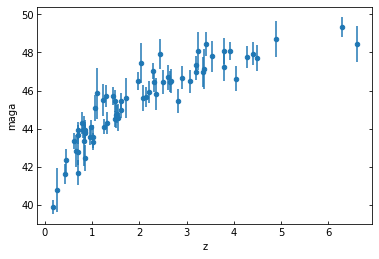

In [20]:
# check to see if plot matches the paper.
data.plot.scatter('z', 'maga', yerr='maga_err', lw=1)

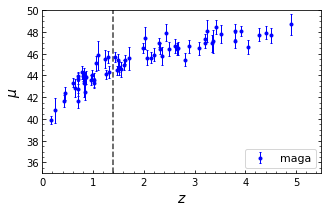

In [21]:
#plt.clf()

plt.figure(figsize=(5,3))
plt.errorbar(data.z, data.maga, yerr=data.maga_err, xerr=None, 
             fmt='.', color='blue', 
             lw=1, capsize=1)
plt.axvline(1.4, 0, 1, alpha=0.75, color='k', ls='--')
plt.minorticks_on()
plt.xlim(0, 5.5)
plt.ylim(35, 50)
plt.legend(loc=0, fontsize=11)
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$\mu$', fontsize=14)
plt.show()

In [23]:
# Save cleaned data to a file.
data.to_csv('Schaefer2007_table6.txt', sep='\t', index=False)

In [24]:
del data

# Kowalski et al. 2008 SN Ia data

In [25]:
data = pd.read_fwf('Kowalski2008_table11_orig.txt', header=None)

In [27]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1993ag,0.0500,17.79,0.05,0.91,0.02,0.09,0.02,36.77,0.15,1,NaN
1,1993o,0.0529,17.61,0.05,0.90,0.01,-0.01,0.02,36.82,0.15,1,NaN
2,1993h,0.0251,16.74,0.09,0.68,0.01,0.21,0.01,35.17,0.17,1,NaN
3,1993b,0.0701,18.38,0.09,0.99,0.03,0.04,0.04,37.57,0.15,1,NaN
4,1992bs,0.0627,18.18,0.05,1.00,0.02,-0.03,0.02,37.55,0.15,1,NaN


In [28]:
colnames = 'name z m m_err s s_err c c_err mag mag_err ref cut'.split(' ')

In [29]:
data.columns = colnames

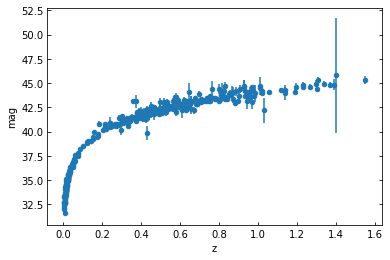

In [30]:
data.plot.scatter('z', 'mag', yerr='mag_err', lw=1)

In [31]:
data.to_csv('Kowalski2008_table11.txt', sep='\t', index=False)